# **Convolutional Neural Network**
Edit – Notebook Settings – Hardware accelerator = GPU

In [1]:
# Import TensorFlow
%tensorflow_version 2.x
import tensorflow as tf

# Import Keras
from tensorflow import keras

# Allows us to work with files and folders
import os

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


## Load the dataset

In [2]:
# Allows us to work with Files
from google.colab import files

# To unzip our ZIP file
import zipfile

# Connects to GoogleDrive
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Unzip the data and save it in another folder
local_zip = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/CatsDogs')
zip_ref.close()

In [4]:
# Declare the paths of the images
base_dir = './CatsDogs'

# train folder
train_dir = os.path.join(base_dir, 'train')

# validation folder
validation_dir = os.path.join(base_dir, 'validation')

# test folder
test_dir = os.path.join(base_dir, 'test')

# Training images folder
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Check how many classes we have in each folder
print('Total number of cat images in training:', len(os.listdir(train_cats_dir)))
print('Total number of dogs images in training:', len(os.listdir(train_dogs_dir)))
print('Total number of cats images in validation:', len(os.listdir(validation_cats_dir)))
print('Total number of dogs images in validation:', len(os.listdir(validation_dogs_dir)))
print('Total number of cats images in test:', len(os.listdir(test_cats_dir)))
print('Total number of dogs images in test:', len(os.listdir(test_dogs_dir)))

Total number of cat images in training: 1000
Total number of dogs images in training: 1000
Total number of cats images in validation: 500
Total number of dogs images in validation: 500
Total number of cats images in test: 500
Total number of dogs images in test: 500


## Review the data

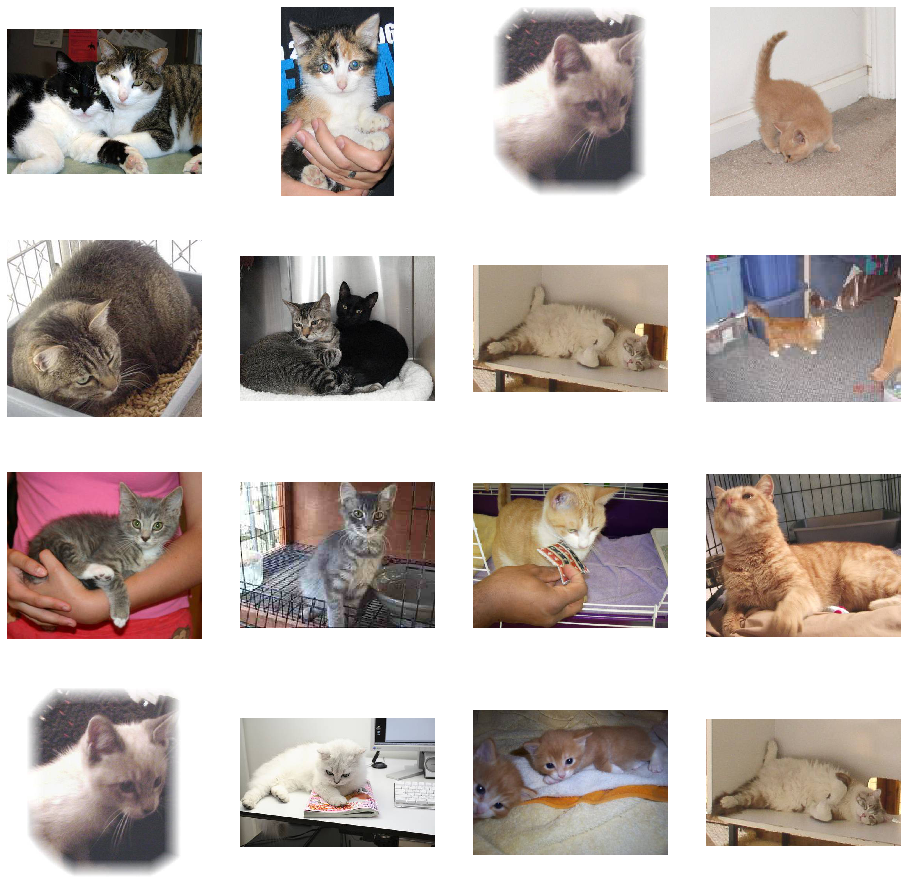

In [5]:
# For visualization purposes
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

nrows = 4
ncols = 4

# Create an index to iterative over our images
pic_index = 0
fig = plt.gcf()                                                                 # image layers
fig.set_size_inches(nrows*4, ncols*4)                                           # total image size

for i in range(0, 16):  # 16 images
  random_cat = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[random.randint(1, len(os.listdir(train_cats_dir)))])  # select a random file inside the train_cats_dir folder
  # Access the subplot inside the fig
  sp = plt.subplot(nrows, ncols, i + 1)
  # Eleminate axis of the subplot, for better visualization
  sp.axis('Off')
  img = mpimg.imread(random_cat)
  plt.imshow(img)
plt.show()

## Build the model

In [6]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
#from keras.callbacks import EarlyStopping                                      # EarlyStopping to prevent Over Fitting
#from keras import regularizers                                                 # Regularizers 

# Create our model
model = tf.keras.Sequential()

# Convulation layer
model.add(Conv2D(32,                                                            # First layer connects to n neurons
                 (3,3),                                                         # Kernel size is 3x3
                 activation = 'relu',                                           # relu converts negative numbers to 0 and postitive do not change
                 input_shape = (150, 150, 3),                                   # 150 by 150 image size with (3) RGB colors
                 padding = 'same'))                                             # 

# Pooling layer
model.add(MaxPooling2D(2,2))                                                    # Matrix size

# Convulation layer
model.add(Conv2D(128,
                 (3,3),
                 activation = 'relu',
                 padding = 'same'))

# Dropout layer
model.add(Dropout(0.2))

# Pooling layer
model.add(MaxPooling2D(2,2))

# Convulation layer
model.add(Conv2D(256,
                 (3,3),
                 activation = 'relu',
                 padding = 'same'))

# Dropout layer
model.add(Dropout(0.2))

# Pooling layer
model.add(MaxPooling2D(2,2))

# Convulation layer
model.add(Conv2D(256,
                 (3,3),
                 activation = 'relu',
                 padding = 'same'))

# Dropout layer
model.add(Dropout(0.5))

# Pooling layer
model.add(MaxPooling2D(2,2))

# Flattens the input
model.add(Flatten())

# Classification layer
model.add(Dense(512,                                                            # Connects to 512 neurons
                activation = 'relu'))

model.add(Dense(1,
                activation = 'sigmoid'))                                        # sigmoid function converts the data to be (binary) between 0 and 1

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       36992     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 256)       0

## Compile the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

# Optimizer for our model
optimizer = RMSprop(lr = 0.001)                                                 # Learning rate

# Compile our model
model.compile(optimizer = optimizer, 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])                                                # accuracy

## Prepare the data

In [8]:
# Create a generator to prepare our input data (images)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling our images, 
# and applying Data Augmentation (creating new and more data inputs)
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,                       # All images divided by 255 pixels, to normalize the data between 0 and 1
                                   rotation_range = 40,                         # Data Augmentation: rotating the images randomly
                                   width_shift_range = 0.2,                     # Moves random images in width
                                   height_shift_range = 0.2,                    # Moves random images in height
                                   shear_range = 0.2,                           # Deforms random images
                                   zoom_range = 0.2,                            # Zooms into the images randomly
                                   horizontal_flip = 'TRUE')                      # Flips horizontally random images

validation_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

# Rescale our training data (images)
train_generator = train_datagen.flow_from_directory(train_dir,                  # Folder
                                                    batch_size = 20,            # Loads 20 images iteratively
                                                    class_mode = 'binary',      # Divides the data into 2 classes (cats and dogs)
                                                    target_size = (150, 150))   # Rescales the images to 150 by 150

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150)) 

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150)) 

print('Our classes are:', train_generator.class_indices)
# This will reshape and distort some images – which shows the importance of having normalized and clean data beforehand (but nothing is perfect)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Our classes are: {'cats': 0, 'dogs': 1}


## 

In [0]:
# Calculate how many steps are we going to make per epoch
batch_size = 20

steps_per_epoch = train_generator.n//batch_size

validation_steps = validation_generator.n//batch_size

## Train the model

In [10]:
# Using fit_generator (.fit) because our data has 3 dimensions, but it will be depreceated in the near future
trained_model = model.fit_generator(train_generator,
                                    steps_per_epoch = steps_per_epoch, 
                                    epochs = 15,
                                    validation_data = validation_generator,
                                    validation_steps = validation_steps,
                                    verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 23s - loss: 1.2208 - acc: 0.5010 - val_loss: 0.6914 - val_acc: 0.4980
Epoch 2/15
100/100 - 16s - loss: 0.7343 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.5290
Epoch 3/15
100/100 - 17s - loss: 0.6976 - acc: 0.5415 - val_loss: 0.6819 - val_acc: 0.5900
Epoch 4/15
100/100 - 16s - loss: 0.6928 - acc: 0.5495 - val_loss: 0.6834 - val_acc: 0.5570
Epoch 5/15
100/100 - 16s - loss: 0.6851 - acc: 0.5975 - val_loss: 0.6657 - val_acc: 0.5880
Epoch 6/15
100/100 - 16s - loss: 0.7576 - acc: 0.6070 - val_loss: 0.6608 - val_acc: 0.6380
Epoch 7/15
100/100 - 16s - loss: 0.6564 - acc: 0.6290 - val_loss: 0.6026 - val_acc: 0.6880
Epoch 8/15
100/100 - 16s - loss: 0.6506 - acc: 0.6290 - val_loss: 0.6358 - val_acc: 0.6730
Epoch 9/15
100/100 - 16s - loss: 0.6505 - acc: 0.6380 - val_loss: 0.5962 - val_acc: 0.6810
Epoch 10/15


<Figure size 432x288 with 0 Axes>

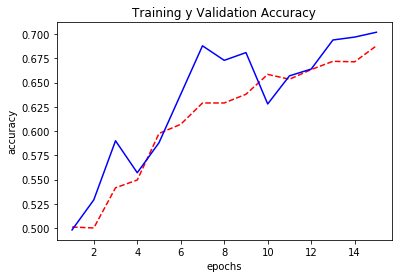

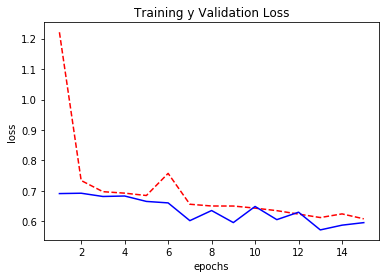

<Figure size 432x288 with 0 Axes>

In [11]:
acc = trained_model.history['acc']
validation_acc = trained_model.history['val_acc']
loss = trained_model.history['loss']
validation_loss = trained_model.history['val_loss']

epochs = range(1, len(acc) + 1, 1)

plt.plot(epochs, acc, 'r--', label = 'Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label = 'Validation Accuracy')
plt.title('Training y Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.figure()

plt.plot(epochs, loss, 'r--', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
plt.title('Training y Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.figure()

## Evaluate the model

In [12]:
# Evaluate model
val_loss, val_acc = model.evaluate_generator(validation_generator)

print('Validation accuracy:' + '{:.2%}'.format(val_acc))
#print('Test loss:', test_loss * 100)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
Validation accuracy:70.20%


## Save the model

In [0]:
import time, os, fnmatch, shutil

if os.path.exists('MyNetworkCatsDogs.h5'):
  t = time.localtime()
  timestamp = time.strftime('%b-%d-%Y_%H%M', t)
  model.save('MyNetworkCatsDogs_{}.h5'.format(timestamp))
  print('Model saved on:', timestamp)
else:
  model.save('MyNetworkCatsDogs.h5')